# Functions utilized

In [26]:
# def univariate(df, sample=500):
#   import pandas as pd
#   import seaborn as sns
#   import matplotlib.pyplot as plt
#   import math

#   df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
#                                       'median', 'max', 'mode', 'mean', 'std', 'skew'])

#   for col in df:
#     # Features that apply to all dtypes
#     dtype = df[col].dtype
#     missing = df[col].isna().sum()
#     unique = df[col].nunique()
#     mode = df[col].mode()[0]
#     if pd.api.types.is_numeric_dtype(df[col]):
#       # Features for numeric dtypes only
#       min = df[col].min()
#       max = df[col].max()
#       mean = df[col].mean()
#       median = df[col].median()
#       std = df[col].std()
#       skew = df[col].skew()
#       df_results.loc[col] = ['-', dtype, missing, unique, min, median, max, mode,
#                             round(mean, 2), round(std, 2), round(skew, 2)]
#     else:
#       # Features for object dtypes only
#       flag = df[col].value_counts()[(df[col].value_counts() / df.shape[0]) < 0.05].shape[0]
#       df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

#   # Make a sub-DataFrame of features that are objects or have only two values; they will need countplots
#   countplots = df_results[(df_results['type']=='object') | (df_results['unique']==2)]
#   # Make a sub-DataFrame of features that are floats or ints with many values which will need histograms
#   histograms = df_results[(df_results['type']=='float64') | ((df_results['unique']>10) & (df_results['type']=='int64'))]
#   histograms = histograms[histograms['unique']>2] # Remove those that are binary

#   # Create a set of countplots for the categorical features
#   f, ax = plt.subplots(1, countplots.shape[0], figsize=[countplots.shape[0] * 1.5, 1.5])
#   for i, col in enumerate(countplots.index):
#     g = sns.countplot(data=df, x=col, color='g', ax=ax[i]);
#     g.set_yticklabels('')
#     g.set_ylabel('')
#     ax[i].tick_params(labelrotation=90, left=False)
#     ax[i].xaxis.set_label_position('top')
#     sns.despine(left=True, top=True, right=True)

#   plt.subplots_adjust(hspace=2, wspace=.5)
#   plt.show()

#   # Create a set of histograms for the numeric features
#   f, ax = plt.subplots(1, histograms.shape[0], figsize=[histograms.shape[0] * 1.5, 1.5])
#   for i, col in enumerate(histograms.index):
#     g = sns.histplot(data=df.sample(n=sample, random_state=1), x=col, color='b', ax=ax[i], kde=True);
#     g.set_yticklabels(labels=[])
#     g.set_ylabel('')
#     ax[i].tick_params(left=False)
#     sns.despine(left=True, top=True, right=True)

#   plt.subplots_adjust(hspace=2, wspace=.5)
#   plt.show()

#   return df_results

def univariate(df, sample=500):
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                       'median', 'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
        dtype = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode().iloc[0]
        except:
            mode = None

        if pd.api.types.is_numeric_dtype(df[col]):
            min_ = df[col].min()
            max_ = df[col].max()
            mean = df[col].mean()
            median = df[col].median()
            std = df[col].std()
            skew = df[col].skew()
            df_results.loc[col] = ['-', dtype, missing, unique, min_, median, max_, mode,
                                   round(mean, 2), round(std, 2), round(skew, 2)]
        else:
            try:
                flag = df[col].value_counts(normalize=True).lt(0.05).sum()
            except:
                flag = None
            df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

    # Countplots: categorical or binary features
    countplots = df_results[(df_results['type'] == 'object') | (df_results['unique'] == 2)]

    # Histograms: numeric with more than 2 unique values
    histograms = df_results[
        (df_results['type'].isin(['float64', 'int64'])) &
        (df_results['unique'].astype(float) > 2)
    ]

    # Plot countplots
    n = countplots.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        ax = ax.flatten() if n > 1 else [ax]
        for i, col in enumerate(countplots.index):
            try:
                sns.countplot(data=df, x=col, color='g', ax=ax[i])
                ax[i].set_ylabel('')
                ax[i].tick_params(labelrotation=90, left=False)
                ax[i].xaxis.set_label_position('top')
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Countplot error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    # Plot histograms
    n = histograms.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        
        if isinstance(ax, (np.ndarray, list)):
            ax = ax.flatten() if hasattr(ax, 'flatten') else list(ax)
        else:
            ax = [ax]

        for i, col in enumerate(histograms.index):
            try:
                sns.histplot(data=df.sample(n=min(sample, len(df)), random_state=1), x=col, color='b', ax=ax[i], kde=True)
                ax[i].set_ylabel('')
                ax[i].tick_params(left=False)
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Histogram error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    return df_results

In [27]:
def bin_categories(df: pd.DataFrame, colsToBin=[], cutoff=0.05, messages=True, replace_with='Other'):
    import pandas as pd

    # If no cols specified, apply to all columns
    if len(colsToBin) == 0: colsToBin = df.columns

    for col in colsToBin:
        if not pd.api.types.is_numeric_dtype(df[col]):
            if messages: print("Categorical")
            # Measure % of group values
            # Filter out all groups that represent counts that are < cutoff %
            # Change remaining group occurrences to replace_with var

            other_list = df[col].value_counts()[df[col].value_counts() / df.shape[0] < cutoff].index
            df.loc[df[col].isin(other_list), col] = replace_with

        else:
            if messages: print("Non-Categorical")

    return df

# Data Understanding

In [28]:
import pandas as pd

# Set option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_movies = pd.read_csv('movies_titles.csv')
df_users = pd.read_csv('movies_users.csv')
df_triple = pd.read_csv('movies_ratings.csv')

display(df_triple.head())
display(df_users.head())
display(df_movies.head())


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


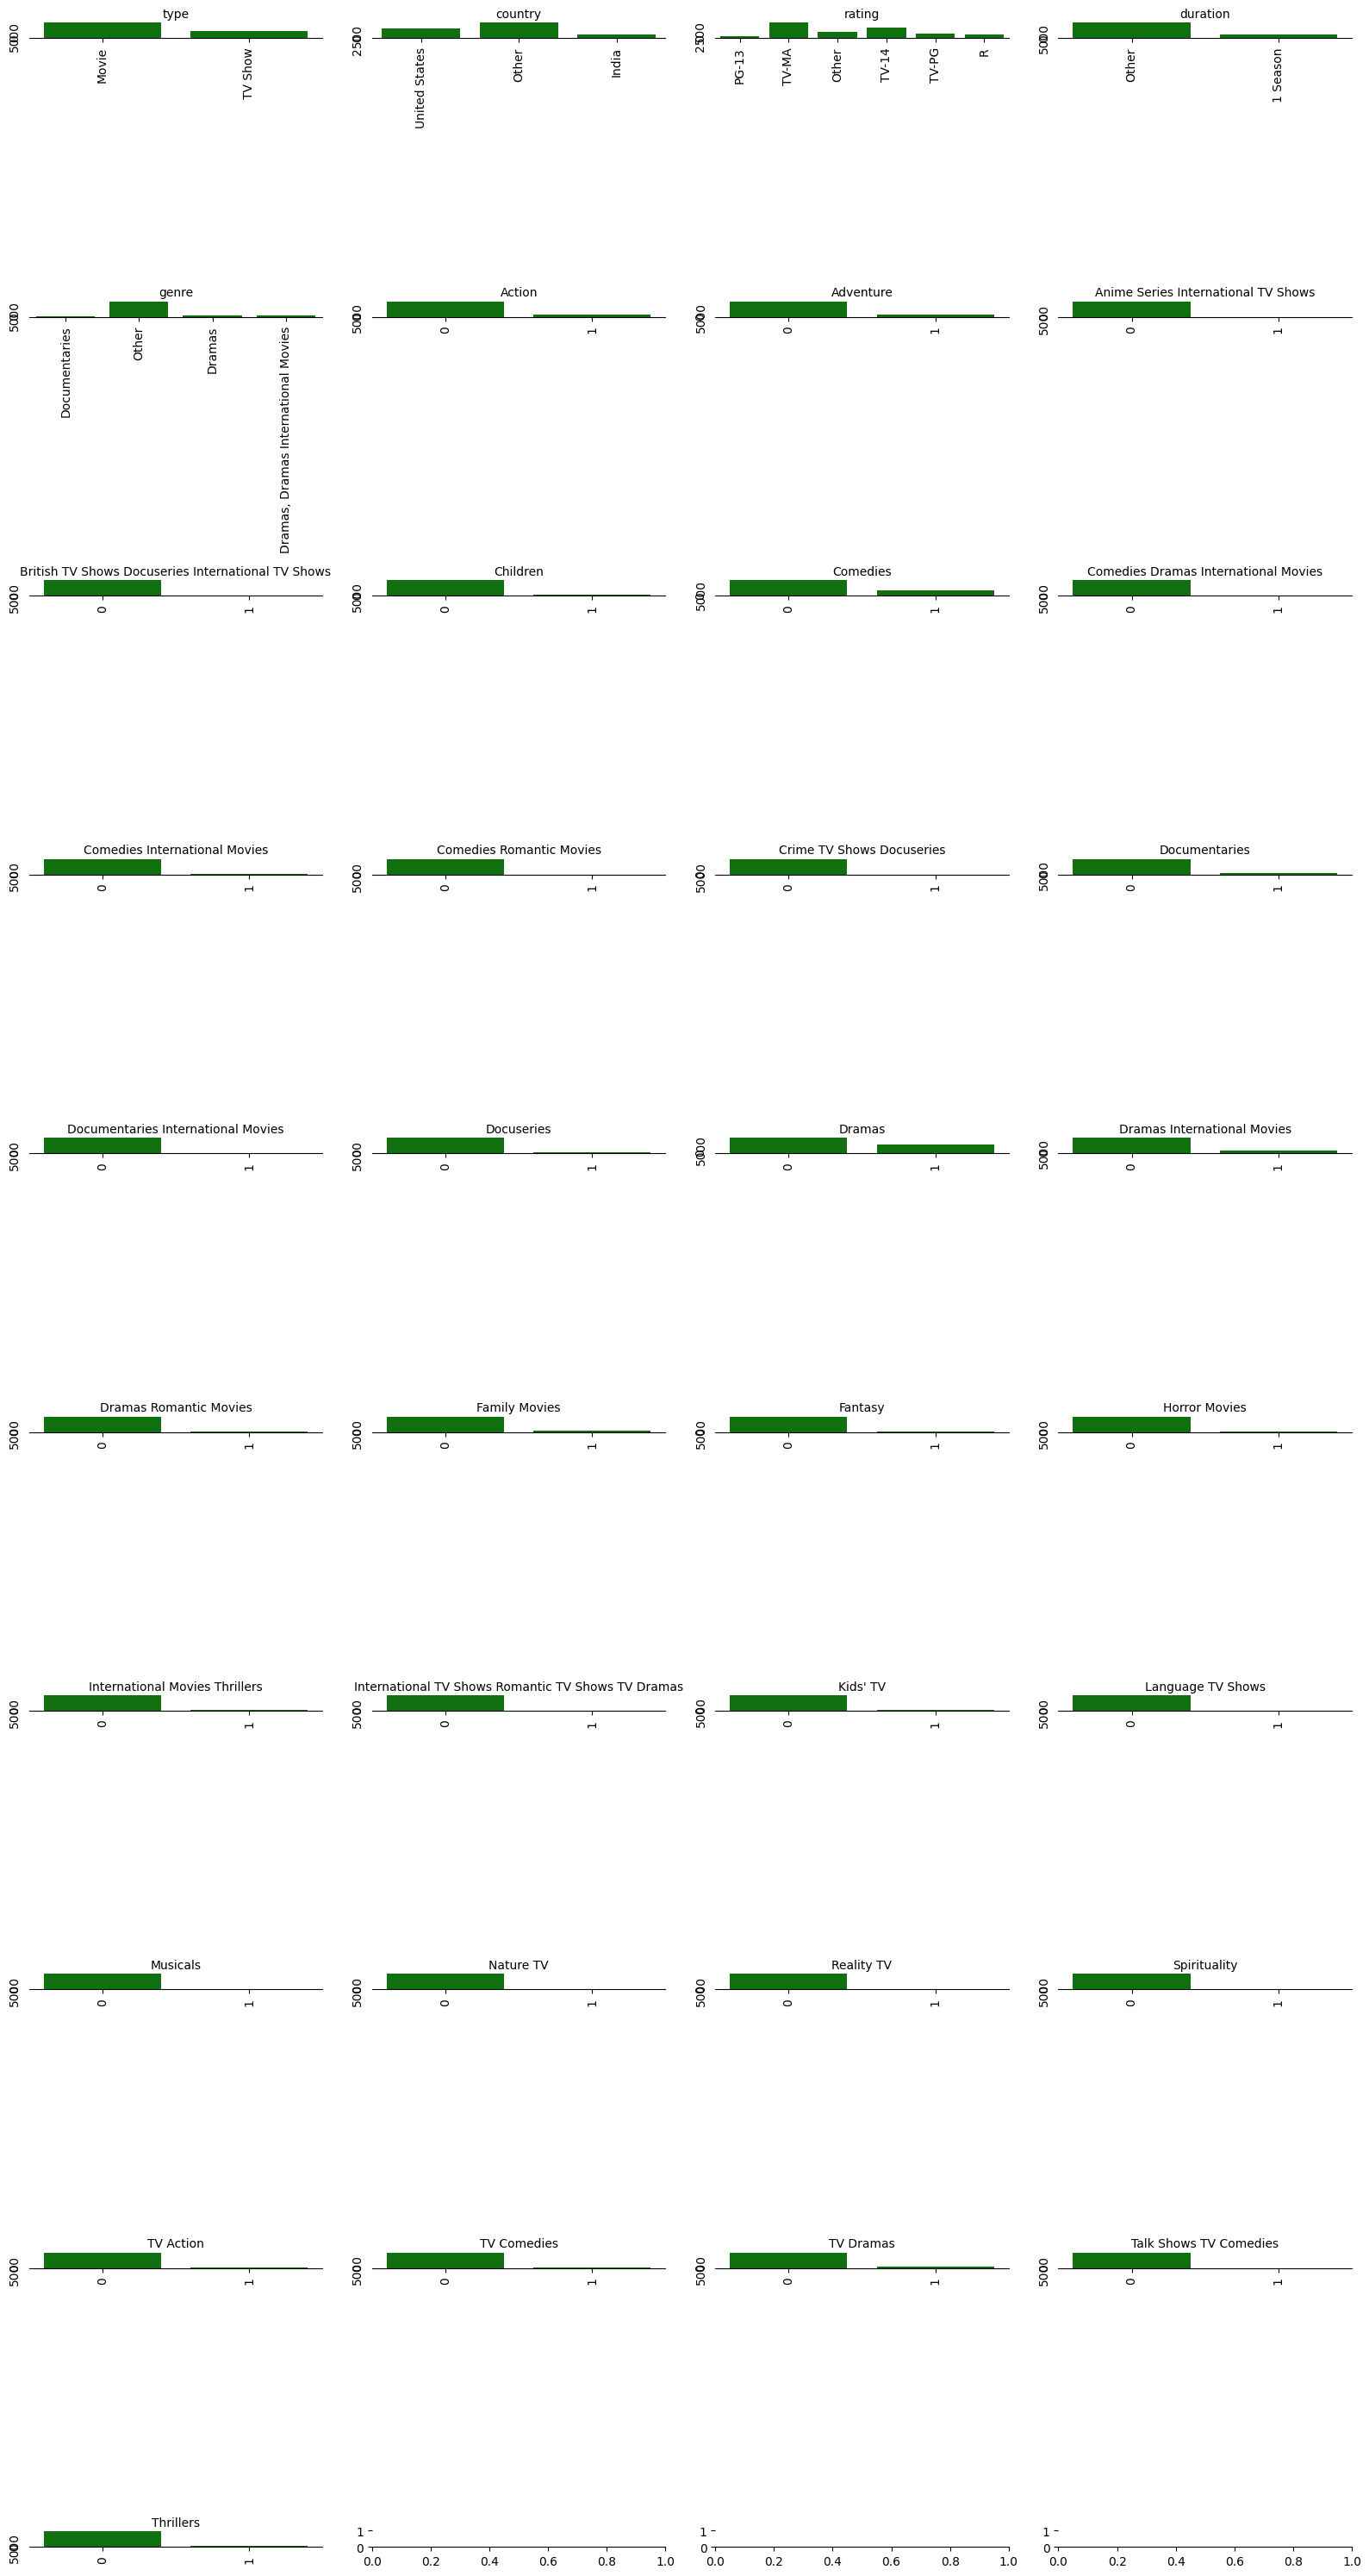

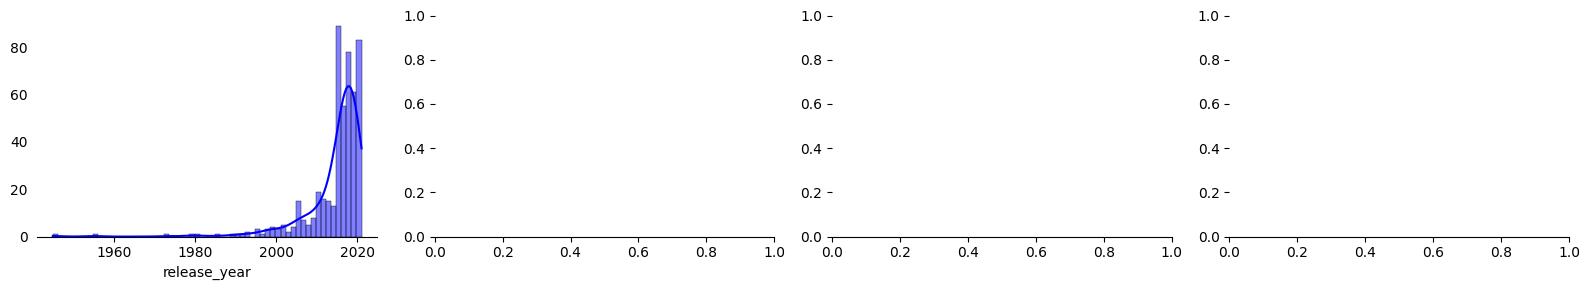

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
genre,0,object,601,4,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04


In [29]:
bin_categories(df_movies, messages=False)
univariate(df_movies.drop(columns=['show_id', 'title','director','cast','description']))

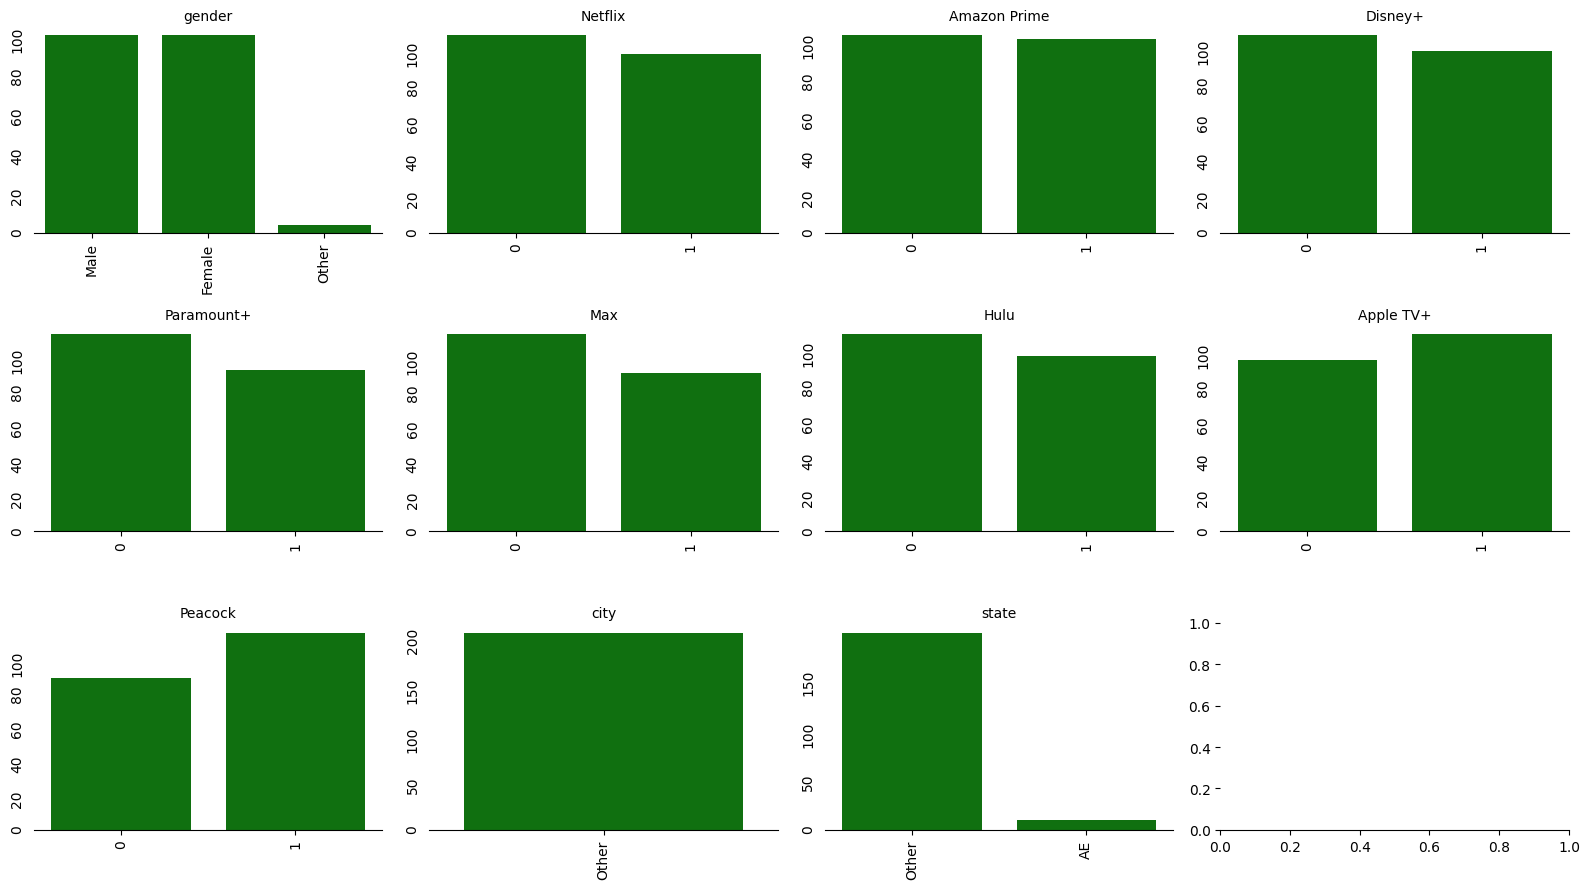

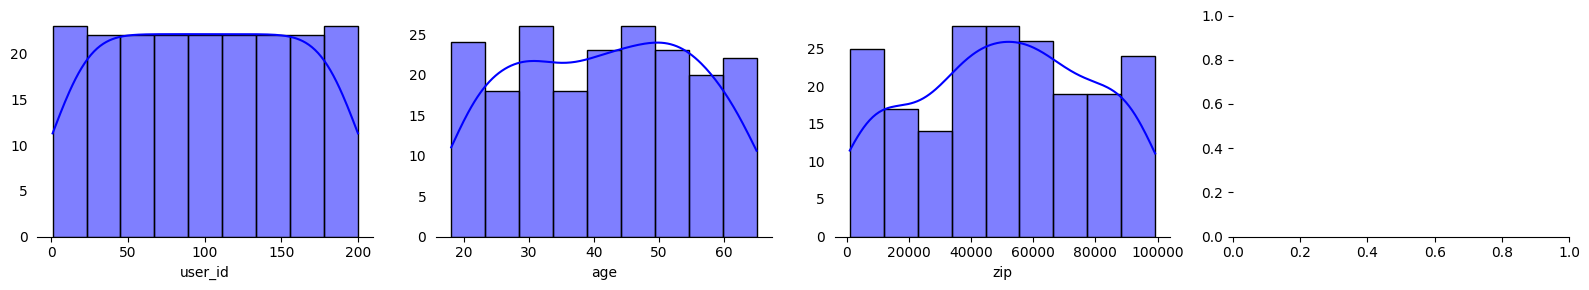

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
user_id,-,int64,0,200,1,100.5,200,1,100.5,57.88,0.0
age,-,int64,0,47,18,42.0,65,30,41.61,13.54,-0.03
gender,1,object,0,3,-,-,-,Female,-,-,-
Netflix,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.1
Amazon Prime,-,int64,0,2,0,0.0,1,0,0.5,0.5,0.02
Disney+,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.08
Paramount+,-,int64,0,2,0,0.0,1,0,0.45,0.5,0.2
Max,-,int64,0,2,0,0.0,1,0,0.44,0.5,0.22
Hulu,-,int64,0,2,0,0.0,1,0,0.47,0.5,0.12
Apple TV+,-,int64,0,2,0,1.0,1,1,0.54,0.5,-0.14


In [30]:
bin_categories(df_users, messages=False)
univariate(df_users.drop(columns=['name','phone','email']))